# DV_04 , 14/11/2021
## Tìm hiều thêm công cụ mới. altair
## Link giữa các đồ thị


Bài toán: Phân tích dataset happy countries.

In [ ]:
# get dataset
!gdown --id 1KPUUQU6DL9aUn8s5crUln3Y5g3onGJPf

Downloading...
From: https://drive.google.com/uc?id=1KPUUQU6DL9aUn8s5crUln3Y5g3onGJPf
To: /content/hpi_data_countries.tsv
100% 6.88k/6.88k [00:00<00:00, 11.9MB/s]


In [ ]:
import pandas as pd

hpi_df = pd.read_csv('/content/hpi_data_countries.tsv', sep='\t')
hpi_df.head()


,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


## Vẽ biểu đồ scatter của 3 cột wellbeing, Happy planet index, region

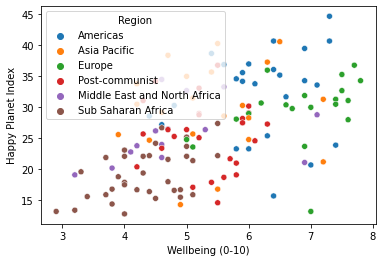

In [ ]:
# using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Wellbeing (0-10)', y='Happy Planet Index', hue='Region', data=hpi_df)
plt.show()


In [ ]:
# import
import altair as alt

In [ ]:
# scatter : mark_circle

alt.Chart(hpi_df).mark_circle().encode(
x='Wellbeing (0-10):Q', # name columns of data (hpi_df)
y='Happy Planet Index:Q',
color='Region:N',
).interactive()

alt.Chart(...)

In [ ]:
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


In [ ]:
# Add honer and tooltip 
alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color='Region:N',
 tooltip=['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)', 'HPI Rank'],
)

alt.Chart(...)

In [ ]:
# Thêm zoom in, zoom out, tooltip
alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color='Region:N',
 tooltip=['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)'],
).interactive()

alt.Chart(...)

In [ ]:
# Select and highlight
selected_area = alt.selection_interval() # altair

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color='Region:N'
).add_selection(
 selected_area
)

alt.Chart(...)

In [ ]:
# Highlight point selected
# selection, highlight
selected_area = alt.selection_interval()

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color=alt.condition(selected_area, 'Region:N', alt.value('lightgray'))
).add_selection(
 selected_area
)

alt.Chart(...)

In [ ]:
# Add zoom
# zoom, selection, highlight
selected_area = alt.selection_interval()

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color=alt.condition(selected_area, 'Region:N', alt.value('lightgray'))
).interactive().add_selection(
 selected_area
)

alt.Chart(...)

In [ ]:
# tooltip, 
# tooltip, zoom, selection, highlight
selected_area = alt.selection_interval()

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color=alt.condition(selected_area, 'Region:N', alt.value('lightgray')),
 tooltip= ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']
).interactive().add_selection(
 selected_area
)

alt.Chart(...)

## Multiple Plots

In [ ]:
# 
# multiple altair charts placed one after the other
# mark_circle : scatter

chart = alt.Chart(hpi_df).mark_circle().encode(
 y='Happy Planet Index',
 color='Region:N'
)

chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')

# alt.vconcat(chart1, chart2)


In [ ]:
# biểu đồ mối liên hệ giữa "Wellbeing (0-10)", "Happy Planet Index"
chart1

alt.Chart(...)

In [ ]:
# biểu đồ mối liên hệ giữa "Life Expectancy (years)", "Happy Planet Index"
chart2

alt.Chart(...)

In [ ]:
# vconcat hoặc dùng &
# 
# alt.vconcat(chart1, chart2)
chart1 & chart2

alt.VConcatChart(...)

In [ ]:
# hconcat hoặc |
# alt.hconcat(chart1, chart2)
chart1 | chart2

alt.HConcatChart(...)

In [ ]:
# hover and tooltip across multiple charts
selected_area = alt.selection_interval()

chart = alt.Chart(hpi_df).mark_circle().encode(
 y='Happy Planet Index',
 color=alt.condition(selected_area, 'Region', alt.value('lightgray'))
).add_selection(
 selected_area
)

chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')

chart1 | chart2

# khi select một vùng ở 1 biểu đồ thì các điểm được chọn sẽ trên cả 2 biểu đồ.

alt.HConcatChart(...)

In [ ]:
# hover and tooltip across multiple charts
selected_area = alt.selection_interval()

chart = alt.Chart(hpi_df).mark_circle().encode(
 y='Happy Planet Index',
 color=alt.condition(selected_area, 'Region', alt.value('lightgray')),
 tooltip = ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']
).add_selection(
 selected_area
)

chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')

chart1 | chart2

alt.HConcatChart(...)

In [ ]:
# Select based on Region

# set(hpi_df.Region) : get unique của data cột Region . (hpi_df.Region.unique() )
input_dropdown = alt.binding_select(options=list(set(hpi_df.Region)))

selected_points = alt.selection_single(fields=['Region'], bind=input_dropdown, name='Select')

color = alt.condition(selected_points,
    alt.Color('Region:N'),
    alt.value('lightgray'))

# scatter
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color=color,
    tooltip=['Region:N', 'Country']
).add_selection(
 selected_points
)


alt.Chart(...)

## Tính Mean trên biểu đồ Bar

In [ ]:
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


In [ ]:
# bar : mark_bar
alt.Chart(hpi_df).mark_bar().encode(
 x='Region:N',
 y='mean(Happy Planet Index):Q', # mean({name_columns}):Q
)

alt.Chart(...)

In [ ]:
# 
alt.Chart(hpi_df).mark_bar().encode(
 x='Region:N',
 y='mean(Happy Planet Index):Q',
).properties(width=400)


alt.Chart(...)

In [ ]:
# thử interactive
import altair as alt
alt.Chart(hpi_df).mark_bar().encode(
 x='Region:N',
 y='mean(Happy Planet Index):Q',
).properties(width=400).interactive()


alt.Chart(...)

In [ ]:
# mean Happy Planet Index
hpi_df['Happy Planet Index'].mean()

26.40785714285713

In [ ]:
# Vẽ biểu đồ line, để hiện thị mean của "Happy Planet Index"
#
# bard
bars = alt.Chart(hpi_df).mark_bar().encode(
 x='Region:N',
 y='mean(Happy Planet Index):Q',
).properties(width=400)

# line
line = alt.Chart(hpi_df).mark_rule(color='firebrick').encode(
 y='mean(Happy Planet Index):Q',
 size=alt.SizeValue(3)
)

# hconcat
bars | line

alt.HConcatChart(...)

In [ ]:
# Biểu đồ line trên biểu đồ bar
# bar
bars = alt.Chart().mark_bar().encode(
 x='Region:N',
 y='mean(Happy Planet Index):Q',
).properties(width=400)

# line
line = alt.Chart().mark_rule(color='firebrick').encode(
 y='mean(Happy Planet Index):Q',
 size=alt.SizeValue(3)
)

# dung hàm của altair là layer
alt.layer(bars, line, data=hpi_df)


alt.LayerChart(...)

In [ ]:
# selection
selected_bars = alt.selection(type='interval', encodings=['x'])

#bar
bars = alt.Chart(hpi_df).mark_bar().encode(
 x='Region:N',
 y='mean(Happy Planet Index):Q',
 opacity=alt.condition(selected_bars, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(width=400).add_selection(
 selected_bars
)

#line
line = alt.Chart(hpi_df).mark_rule(color='firebrick').encode(
 y='mean(Happy Planet Index):Q',
 size=alt.SizeValue(3)
).transform_filter(
 selected_bars
)

bars + line


alt.LayerChart(...)

In [ ]:
# Kiểm tra hai Region, Europe and Middle East And North Africa
# Mean Happy planet index
is_europe_africa = hpi_df['Region'].apply(lambda x: x in ['Europe', 'Middle East and North Africa'])

hpi_df[is_europe_africa]['Happy Planet Index'].mean()


28.014705882352942

In [ ]:
# Heatmap : mark_rect
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True),
    alt.Color('count()',
    scale=alt.Scale(scheme='greenblue'),
    legend=alt.Legend(title='Total Countries')
    )
)


alt.Chart(...)

In [ ]:
# Thêm zoom vào heatmap
# interactive()

alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True),
    alt.Color('count()',
    scale=alt.Scale(scheme='greenblue'),
    legend=alt.Legend(title='Total Countries')
 )
).interactive()


alt.Chart(...)

In [ ]:
# Change scale thành circles
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True)
)

# mark_point
circles = heatmap.mark_point().encode(
    alt.ColorValue('lightgray'),
    alt.Size('count()',
    legend = alt.Legend(title='Records in Selection')
    )
)

heatmap + circles

alt.LayerChart(...)

In [ ]:
# Vẽ biểu bar biểu thị sôs lượng record của Region
alt.Chart(hpi_df).mark_bar().encode(
 x='Region:N',
 y='count():Q',
).properties(width=350)

alt.Chart(...)

In [ ]:
# Kiểm tra lại
hpi_df['Region'].value_counts()

Sub Saharan Africa              34
Post-communist                  26
Americas                        25
Asia Pacific                    21
Europe                          20
Middle East and North Africa    14
Name: Region, dtype: int64

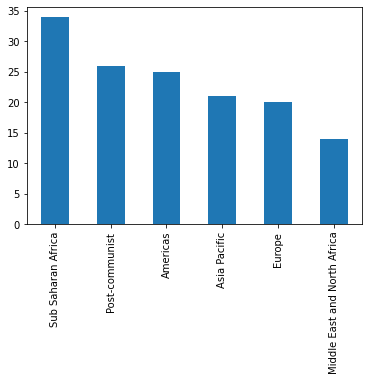

In [ ]:
# Dùng pandas để vẽ
hpi_df['Region'].value_counts().plot.bar()

# Không bắt mắt hơn so với biểu đồ trên

In [ ]:
# Concat bar vs heatmap

# bar
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='count():Q',
).properties(width=350)

# heatmap
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()',
    scale=alt.Scale(scheme='greenblue'),
    legend=alt.Legend(title='Total Countries')
    )
).properties(width=350)

# hconcat
bars | heatmap


alt.HConcatChart(...)

In [ ]:
# tạo selection
selected_region = alt.selection(type="single", encodings=['x'])

# heatmap
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()',
    scale=alt.Scale(scheme='greenblue'),
    legend=alt.Legend(title='Total Countries')
    )
).properties(
 width=350
)

# scale -> circles
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
    legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
 selected_region
)

# bard
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='count()',
    color=alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=350
).add_selection(selected_region)

heatmap + circles | bars

alt.HConcatChart(...)

In [ ]:
help(alt)

Help on package altair:

NAME
    altair - # flake8: noqa

PACKAGE CONTENTS
    _magics
    datasets
    examples (package)
    expr (package)
    sphinxext (package)
    tests (package)
    utils (package)
    vega (package)
    vegalite (package)

SUBMODULES
    api
    channels
    core
    data
    display
    mixins
    schema
    theme
    v4

FUNCTIONS
    load_ipython_extension(ipython)

DATA
    SCHEMA_URL = 'https://vega.github.io/schema/vega-lite/v4.8.1.json'
    SCHEMA_VERSION = 'v4.8.1'
    TOPLEVEL_ONLY_KEYS = {'$schema', 'autosize', 'background', 'config', '...
    Undefined = Undefined
    VEGAEMBED_VERSION = '6'
    VEGALITE_VERSION = '4.8.1'
    VEGA_VERSION = '5'
    data_transformers = DataTransformerRegistry(active='default', register...
    datum = datum
    renderers = RendererRegistry(active='colab', registered=['co...'mimety...
    themes = ThemeRegistry(active='default', registered=['dar...e', 'opaqu...

VERSION
    4.1.0

FILE
    /usr/local/lib/python3.7/dis

In [ ]:
# So sánh

In [ ]:
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


In [ ]:
hpi_df_americas = hpi_df[hpi_df['Region'] == 'Americas']
hpi_df_americas.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
5,6,Panama,Americas,77.2,6.9,19%,2.8,39.5
6,7,Nicaragua,Americas,74.3,5.4,25%,1.4,38.7


In [ ]:
hpi_df_americas = hpi_df_americas[['Wellbeing (0-10)', 'Happy Planet Index']]
hpi_df_americas.head()

,Wellbeing (0-10),Happy Planet Index
0,7.3,44.7
1,7.3,40.7
2,6.4,40.7
5,6.9,39.5
6,5.4,38.7


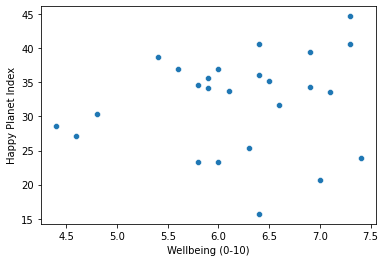

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Wellbeing (0-10)', y='Happy Planet Index', data=hpi_df_americas)
plt.show()

In [ ]:
# Nhận xét: Không bắt mắt hơn.

# Bài tập

Thực hành trên Altar
1. Read dataset googleplaystore.csv
2. Remove the row chứa value NA (missing value)
3. Vẽ biểu đồ bar plot, biểu diễn số lượng app của mỗi thể loại trong cột **Content Rating**
4. Vẽ một heatmap để biểu diễn số lượng app trên toàn ứng dụng phạm vi của **Category** và **Rating**
5. Merge code của barchart và heatmap. Và vẽ biểu đồ biểu diễn cả 2 plots linked.

Hint

Sau bước 3
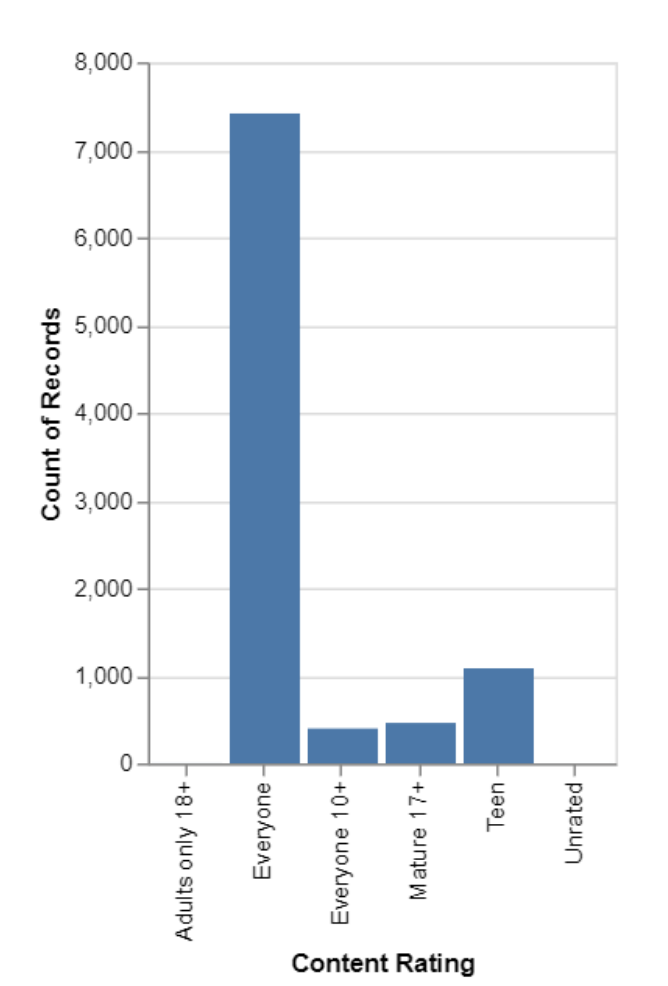

Sau bước 4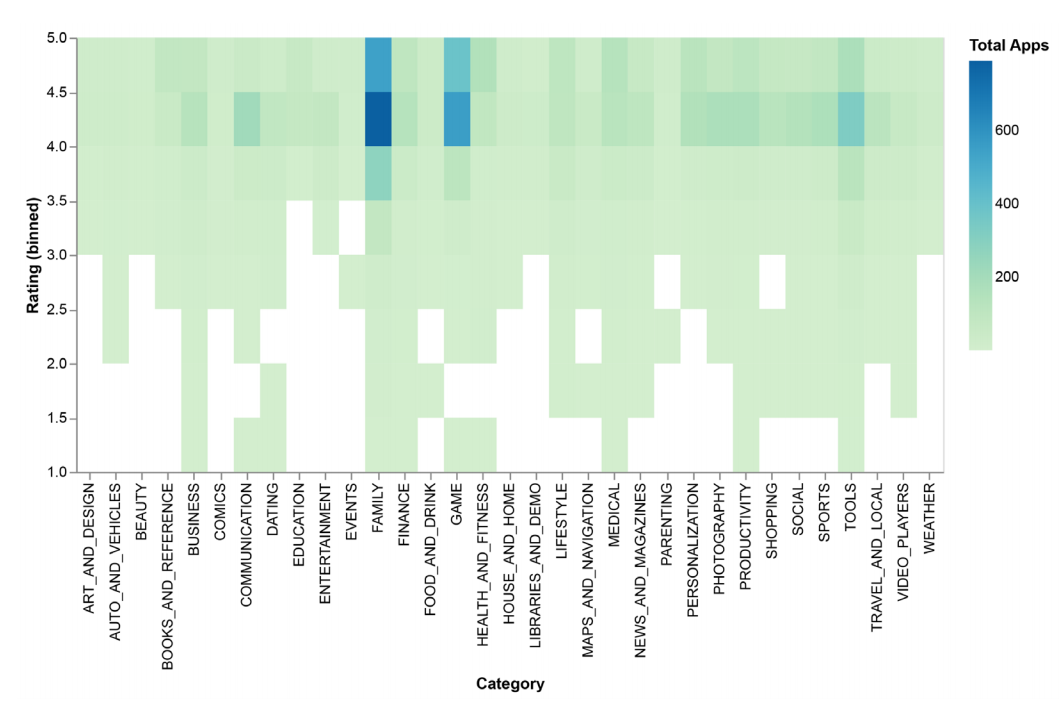

sau bước 5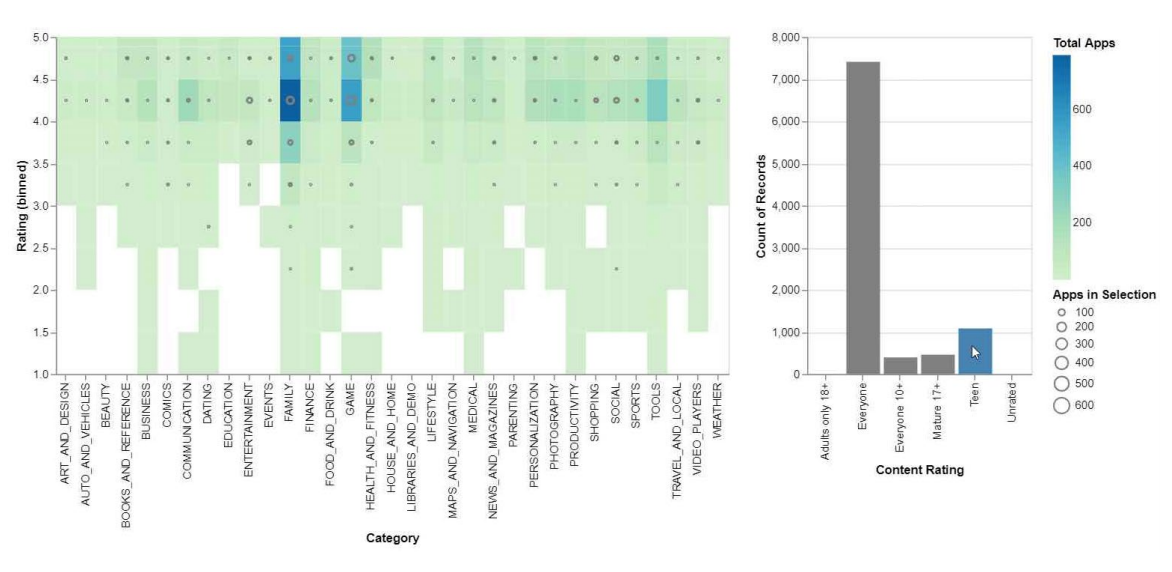